# STOCK MARKET PREDICTION | Text Mining Project


## Objective
Develop an NLP model to predict the daily closing values of a stock market index based on news. Deliver a notenook with all the experiments with all the technique used and a ready to run final solution, using the model which achieves higher performance. 

## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
corpora = pd.read_csv('train.csv')
corpora

,Id,Closing Status,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
0,0,1,Milan court convicts Berlusconi of tax evasion...,Suicide bomber kills 20 in Afghan mosque,"After the biggest double dip since WW2, the UK...",Billions in Hidden Riches for Family of Chines...,Former Italian Prime Minister Silvio Berluscon...,"Through Her Sister's Eyes -- ""This seemingly m...",UN to investigate civilian deaths from US dron...,Ben Goldacre: Closed drug trials leave patient...,...,Britain rejects US request to use UK bases in ...,New York Times blocked in China over Wen Jiaba...,What Are the Odds That Israel Just Attacked Su...,Opinion poll shows 43% of French people see Is...,New York Times blocked by China after report o...,The British government opposed the establishme...,"Ashok Khemka, a bureaucrat in India, has been ...",Malala's parents overjoyed after first visit i...,"A victory for self-defence, but only a partial...",British ExxonMobil oil chief 'assassinated' in...
1,1,0,Iraq Police Training: $200 Million Wasted On P...,Pussy Riot: will Vladimir Putin regret taking ...,Syrian troops vow to 'purge' Aleppo of rebels ...,Four Iranians Sentenced to Death Over $2.3 Bln...,"Christchurch, New Zealand rebuild plans unveil...",Deadly Ebola Virus Reaches Ugandan Capital,Cat electrocuted; East Delhi goes powerless fo...,"In Israel, at least 7 people have set themselv...",...,Britain just signed a 25 year contract to let ...,"Air pollution turns Beijing into ""Greyjing""",Israeli troops kill Palestinian at checkpoint,Couple stoned to death in Mali for having sex ...,Two Journalists Freed by Syrian Rebels After W...,"Across Latin America, leaders appalled by the ...",Germany Breaks 25% Renewable Energy Barrier -...,Uruguay Considers Legalizing Marijuana to Stop...,"Beijing's Real Olympic Hero: Meet Ji Sizun, im...","Philippines birth control: Filipinos want it, ..."
2,2,0,"Al Shabaab kidnaps, interrogates new Somali mi...",The 'For Neville' email: two words that could ...,Explosion rocks Norwegian PM's office,"Speaker of The House says UK ""parliament has r...","James Murdoch knew of phone hacking, former Ne...",Shooting at Norwegian Social Democratic Youth ...,UN report claims North Korea and Iran are exch...,Greece defaults... selectively.,...,East Africa's famine: Millions of human beings...,Egypt's military rulers ban foreign election o...,Large explosion in Oslo at Prime ministers off...,"A whole block just exploded in Oslo, Norway. ...",James Murdoch Accused of Lying to Parliament,Eleven killed during mass protests in Syria\n\n,Huge explosion in downtown Oslo,Indian Government Blocks Leading File-Sharing ...,"The Bin Laden Vaccine: Yes, vaccinations are a...","Posted last week, but buried beneath the bigge..."
3,3,1,Sweden With Entitlements &amp; Health Care Sur...,Military and medical experts call on doctors t...,Syria's only casino has been shut down and a b...,"Japan is ""very sorry"" about irradiating the oc...",First mention in a Chinese newspaper of the de...,"In post-Mubarak Egypt, abductions of women hav...","Gadhafi, in letter, asks Obama to end air stri...","Tokyo Electric Power Company ""called the initi...",...,The cop who pushed Ian Tomlinson to the ground...,NHK: Radioactivity at Fukushima Daiichi No. 1-...,Ai Weiwei's detention suggests the bad old day...,75 Year old Georgian Woman shuts down Armenian...,English surgeons protest long wait times for m...,"""Academic researchers worldwide, including vet...","Julian Assange: ""WikiLeaks is the intelligence...",Sudan accuses Israel over Port Sudan air strik...,New Israeli-Palestinian peace proposal present...,International Energy Agency says peak oil happ...
4,4,0,FIFA has banned Croatian defender Josip Simuni...,Devyani arrest: India asks all US diplomats to...,Sochi Olympic critics get terrorist treatment ...,"London Bankers Expec

In [3]:
corpora = corpora.drop(['Id'], axis=1)

## Data Exploration
Analyse and provide conclusions and visual information about the data

<AxesSubplot:>

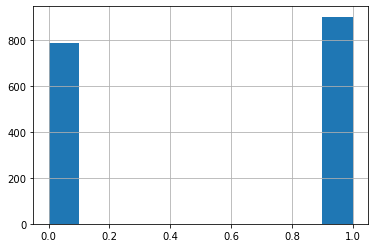

In [4]:
corpora['Closing Status'].hist()

In [5]:
corpora['Closing Status'].describe()

count    1690.000000
mean        0.533728
std         0.499009
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Closing Status, dtype: float64

In [6]:
#wordcount for each headline
corpora_wordcount = []
for row in range(0, len(corpora.index)):
    corpora_wordcount.append(' '.join(str(x) for x in corpora.iloc[row,1:26]))
    
corpora_wordcount = pd.DataFrame(data = corpora_wordcount, columns = ['headline'])

corpora_wordcount['word_count']  = corpora_wordcount.iloc[:,0].apply(lambda x: len(str(x).split(" ")))
corpora_wordcount


,headline,word_count
0,Milan court convicts Berlusconi of tax evasion...,601
1,Iraq Police Training: $200 Million Wasted On P...,512
2,"Al Shabaab kidnaps, interrogates new Somali mi...",312
3,Sweden With Entitlements &amp; Health Care Sur...,543
4,FIFA has banned Croatian defender Josip Simuni...,547
...,...,...
1685,"North Korea Fires Another Missile, Just as Oba...",414
1686,Russia Bans Fresh Vegetables from EU because o...,496
1687,b'Seven new albino killings have been reported...,438
1688,"b""Torture Victim Turns Tables on Libya at 'Rac...",417


<AxesSubplot:>

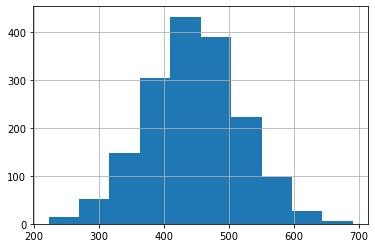

In [7]:
corpora_wordcount['word_count'].hist()

In [8]:
all_words = ' '.join(corpora_wordcount['headline']).split()
freq = pd.Series(all_words).value_counts()
freq.sort_values(ascending=False)[0:10]

the    23031
to     21858
of     19192
in     18501
a      11939
and    10511
for     7700
on      6419
is      5213
-       4232
dtype: int64

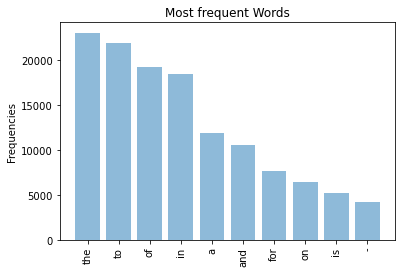

In [9]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.ylabel('Frequencies')
plt.title('Most frequent Words')
plt.xticks(rotation=90)
plt.show()

## Corpus Split
Applying methods to split the training corpus into train/validation sets in order to evaluate the model's performance

In [10]:
#training instances, the closure status is what we ant to predict, depends if we also have validation set
C_train, C_test, y_train, y_test = train_test_split(corpora, corpora['Closing Status'], test_size=0.20, random_state=4)

In [11]:
len(C_train), len(C_test), len(y_train), len(y_test)

(1352, 338, 1352, 338)

In [12]:
C_train.head()

,Closing Status,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
40,0,Speedy Trains Transform China - Just five year...,China to lease 7.4 million acres of farmland i...,Australian Broadcasting Commission's Media Wat...,US military to stop updates on hunger strike a...,Poland declines once again to answer questions...,Pope Francis orders excommunication of priest ...,"Pakistan 7.8 earthquake on Sept. 24,2013 A ""7....",EU not satisfied with US retorts on spying sca...,Brazilian president Rousseff launches tirade a...,...,Very big quake (7.8) in Pakistan creates new i...,Humankinds Most Dangerous Moment: Fukushima Fu...,"Hundreds riot at Foxconn's China factory-""Arme...",44kg of gold bars worth $2million were loaded ...,Guys turned away from a nightclub in Russia re...,NSA accused of hacking into India's nuclear sy...,You CANNOT masturbate publicly in Sweden. The ...,BBC News - China says it has banned the export...,Untouchable girl raped. Woman police officer i...,4-year-old British boy in Nairobi mall confron...
1130,1,US Wins Appeal in Battle to Extradite Kim Dotcom,Airline refuses to change woman's flights afte...,Euro Zone Unemployment Rises to Record: 11.9 p...,Delhi protest over 'sex attack' on seven-year-...,"French forces in Mali have killed Abu Zeid, le...","""Five women and one man are suing the Met Poli...",BBC News - Mount Etna erupts from 'new crater',Benedict XVI Formally Ends His Papacy and Leav...,"The 81-story skyscraper is all but invisible, ...",...,2 US Navy Sailors Convicted in Okinawa Rape,Publicly owned Royal Bank of Scotland admits '...,"""Iran's nose jobs per capita rate is seven tim...",Taco Bell finds traces of horse meat in U.K. p...,"In Kenya, Half Brother To Obama Runs For Governor",Iran has stepped up executions of prisoners i...,Manning statement: Americans had a right to kn...,First photos of Dennis Rodman and Kim Jong Un ...,Here ComeChinas Drones - China is developing i...,"China Building 29 Nuclear Reactors, 40% of the..."
11,0,China Passes Japan to Become No. 2 Economy - N...,Afghan Couple Stoned to Death on Taliban Order...,Iran Opposition: Sanctions Helping Ahmadinejad...,French Thieves Use Their Breasts to Distract V...,Israeli IDF solider poses next to abused priso...,Journalist Exposes How Private Investigation F...,North Korea succession: Kim Jong Il appoints J...,North Korea vows 'merciless counterblow' to U....,See if you find honest reporting of this in th...,...,Barack Obama personally warned Turkish Prime ...,"Almost everywhere else in Europe, returning Je...",Is Africa still being looted? World Bank dodge...,"""Like Mr bin Laden, Mr Gingrich is apparently ...",Russia: Loss of 25 percent of Russian wheat cr...,Assange hired for Swedish tabloid Aftonbladet ...,NASA satellite view of the extent of the massi...,President Barack Obama has warned the Turkish ...,Female Israeli officer poses for Facebook in f...,British kickboxer picks fight with U.S. marine...
63,1,Japan declares 'nuclear emergency' after quake,A truly brave Cameraman films the intense figh...,Amazing photos from Libya as rebels flee Ras L...,Impressive video of the tsunami in Tokio after...,4.5 Earthquake just hit Hawaii,Indonesia volcano erupts,Japan's 8.9 magnitude earthquake triggers tsun...,Raw Video: Tsunami Slams Northeast Japan [VID],Video of tsunami hitting japan. Devastating.,...,"""Why is it being described as a civil war when...",\nEntire Japanese City On Fire After Earthquak...,Judge orders Twitter to give up data on Wikileaks,"Putin proposes scrapping visas between Russia, US",New Scientist: Japan's quake updated to magnit...,Huge whirlpool created after Japan quake [video],Massive 7.9 earthquake in northeastern Japan. ...,"REPORT: 88,000 People Are Missing In Japan",The containment building at Fukushima Unit 1 i...,Stunning Photos of Japan's earthqua

In [13]:
C_test.head()

,Closing Status,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
102,0,35 Ancient Pyramids Found in Sudan,The oldest known living wild bird in the world...,Forty Winks on a slow train in China: an AFP s...,"Australian Wind Energy Now Cheaper Than Coal, ...",Irans supreme leader rejects Joe Bidens offer ...,Swiss consul's wife hits couple on bike and es...,France is on the hunt for would-be Islamist fi...,20 yr old woman burned alive for 'sorcery' in ...,A small hole for Mars a giant hole for mankind...,...,"In Yemen, drone strikes are causing a spike in...",Doctor shocked by rape victim's injuries,Three Canadians invent worlds most energy effi...,9 year old gives birth,Over the past year a New Zealander named Roger...,High hopes: Why science is seeking a pardon fo...,Dad must pay child support for 3 kids that are...,"Poachers kill 11,000 Gabon elephants in under ...",Colombia's Farc proposes legal coca and mariju...,Two Russian fighter jets have violated Japanes...
1211,0,Russia's largest bank will offer the 100 best ...,"Canada tightens its borders after Tuesday, Nov...",Sandy: UN to send emergency food aid to storm-...,BBC News - Microsoft ditches Windows Live Mess...,China's outgoing leader and his likely success...,Chinese author tells of his Tibetan wife being...,India and Canada finalise conditions of nuclea...,Bahraini authorities have revoked the citizens...,Canada's legal hemp industry growing - Busines...,...,Chinas Communist Party Congratulates Obama on ...,Turkey conducts ground raid against Kurd milit...,Pakistan parents killed daughter with acid for...,French gay marriage and adoption bill backed b...,The re-election of Barack Obama may open an op...,Britain condemns Israel's new construction pla...,Poll: Israel viewed negatively around the worl...,Mumbais Historic Haji Ali Bans Women From Most...,"Unable to copy it, China tries building own je...",Outrageous plan for $264 billion mega-city in ...
961,0,Third of children born in UK have foreign-born...,Garbage shortage looms in Northern Europe,Venezuela brawl: 22 hurt in parliament fight b...,"India's total population is 1.21 billion, fina...",UK ministers are preparing to spin off 'dozens...,Last 15 Rhinos in Mozambique Killed by Poacher...,"Mexico's Congress has passed a major reform, i...",The number of people killed in the collapse of...,Japan and Russia want to finally end World War...,...,Pew Study: Muslims across the globe tend to be...,Morocco's police is looking for an atheist act...,Mt. Fuji poised to get World Heritage status,New Zealand says no to bizarre baby names 4Rea...,BBC News - Airliner 'had narrow miss with UFO',Obama preparing to send lethal arms to Syrian ...,Last rhinos in Mozambique killed by poachers,The horrific chemical weapons attack that prob...,Sony CEO and 39 other executives give up bonus...,"Split up or son will be expelled, school tells..."
1602,0,Hamas denies any involvement with the rocket a...,"Russian rapper jailed for insulting police - ""...","Bubonic plague breaks out in Peru. 1 dead, 31...",It's Time for Germany to Change Its Immigratio...,British city wants to buy all its councilors a...,Iran says the Brazilian president did not have...,"Geert Wilders, whose anti-immigration party do...",Germany gave hit list to secret US unit,Germanys constitutional court in Karlsruhe rul...,...,"Ayatollah Ali Khamenei: ""Although music is hal...",Israel-Lebanon troops exchange fire.,How does stoning work in Iran? - By Christophe...,"Israel, Lebanon forces exchange fire on border",Wheat prices have doubled over the last two mo...,"In a bid to increase revenues, the Greek autho...","Hey reddit, just a reminder: as of this weeken...",Price for a potential Israeli strike on Iran? ...,Mexican government allows marriage between gay...,"South Africa's former police commissioner, the..."
487

In [14]:
y_train.head()

40      0
1130    1
11      0
63      1
1683    1
Name: Closing Status, dtype: int64

In [15]:
y_test.head()

102     0
1211    0
961     0
1602    0
487     0
Name: Closing Status, dtype: int64

## Data Preprocessing
Implement and experiment different preprocessing techniques

In [16]:
stop = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [17]:
from tqdm import tqdm
def clean(text_list, lemmatize):
    
    cleantext = []
       
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        text = str(text).lower()
        
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        text = re.sub("br", "", text)
        
        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])
        
        #Lemmatize
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        cleantext.append(text) 
           
    return cleantext


In [18]:
for i in range(1,26):
    C_train.iloc[:,i] = clean(C_train.iloc[:,i], lemmatize = True)


100%|███████████████████████████████████████████████████████████████████████████| 1352/1352 [00:00<00:00, 12190.44it/s]


In [19]:
for i in range(1,26):
    C_test.iloc[:,i] = clean(C_test.iloc[:,i], lemmatize = True)

100%|██████████████████████████████████████████████████████████████████████████████| 338/338 [00:00<00:00, 9414.01it/s]


In [20]:
C_test.head()

,Closing Status,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
102,0,ancient pyramid found sudan,oldest known living wild bird world year old a...,forty wink slow train china afp stringer find ...,australian wind energy cheaper coal gas bnef say,iran supreme leader reject joe bidens offer di...,swiss consul wife hit couple bike escape get c...,france hunt would islamist fighter home fearfu...,yr old woman burned alive sorcery png police a...,small hole mar giant hole mankind nasa mar rov...,...,yemen drone strike causing spike support al qa...,doctor shocked rape victim injury,three canadian invent world energy efficient l...,year old give birth,past year new zealander named roger shepherd a...,high hope science seeking pardon psychedelics,dad must pay child support kid court rule canada,poacher kill gabon elephant decade african cou...,colombia farc proposes legal coca marijuana cr...,two russian fighter jet violated japanese airs...
1211,0,russia largest bank offer best customer kazakh...,canada tightens border tuesday november th pre...,sandy un send emergency food aid storm hit cuba,bbc news microsoft ditch window live messenger...,china outgoing leader likely successor pushing...,chinese author tell tibetan wife ejected beiji...,india canada finalise condition nuclear deal,bahraini authority revoked citizenship shia ac...,canada legal hemp industry growing business cb...,...,china communist party congratulates obama victory,turkey conduct ground raid kurd militant north...,pakistan parent killed daughter acid eyeing bo...,french gay marriage adoption bill backed cabinet,election barack obama may open opportunity new...,itain condemns israel new construction plan be...,poll israel viewed negatively around world bbc...,mumbai historic haji ali ban woman sacred area,unable copy china try building jet engine reuters,outrageous plan billion mega city korea
961,0,third child born uk foreign born parent white ...,garbage shortage loom northern europe,venezuela awl hurt parliament fight lawmaker w...,india total population billion final census re...,uk minister preparing spin dozen state owned s...,last rhino mozambique killed poacher helped pa...,mexico congress passed major reform attempt ma...,number people killed collapse factory building...,japan russia want finally end world war ii agr...,...,pew study muslim across globe tend deeply comm...,morocco police looking atheist activist wanted...,mt fuji poised get world heritage status,new zealand say bizarre baby name real juztice...,bbc news airliner narrow miss ufo,obama preparing send lethal arm syrian opposit...,last rhino mozambique killed poacher,horrific chemical weapon attack probably wasnt...,sony ceo executive give bonus unprecedented ge...,split son expelled school tell lesbian couple ...
1602,0,hamas denies involvement rocket attack struck ...,russian rapper jailed insulting police forget ...,bubonic plague eaks peru dead infected,time germany change immigration law,itish city want buy councilors ipad claiming s...,iran say azilian president enough information ...,geert wilder whose anti immigration party doub...,germany gave hit list secret u unit,germany constitutional court karlsruhe ruled t...,...,ayatollah ali khamenei although music halal pr...,israel lebanon troop exchange fire,stoning work iran christopher beam slate magazine,israel lebanon force exchange fire border,wheat price doubled last two month expert pred...,bid increase revenue greek authority employing...,hey reddit reminder weekend iran imprisoned th...,price potential israeli strike iran palestinia...,mexican government allows marriage gay couple ...,south africa former police commissioner former...
487,0,iran summarily executed people month u n report,isi jihadis using passport stolen westerner tr...,strong magnitude earthquake hit northeast

In [21]:
C_train.head()

,Closing Status,Headline1,Headline2,Headline3,Headline4,Headline5,Headline6,Headline7,Headline8,Headline9,...,Headline16,Headline17,Headline18,Headline19,Headline20,Headline21,Headline22,Headline23,Headline24,Headline25
40,0,speedy train transform china five year rail sy...,china lease million acre farmland ukraine year...,australian oadcasting commission medium watch ...,u military stop update hunger strike guantanam...,poland decline answer question alleged cia jail,pope francis order excommunication priest spok...,pakistan earthquake sept magnitude earthquake ...,eu satisfied u retort spying scandal,azilian president rousseff launch tirade u nsa...,...,big quake pakistan creates new island link pic...,humankind dangerous moment fukushima fuel pool...,hundred riot foxconn china factory armed worke...,kg gold bar worth million loaded onto plane la...,guy turned away nightclub russia return automa...,nsa accused hacking india nuclear system,cannot masturbate publicly sweden earlier repo...,bbc news china say banned export north korea s...,untouchable girl raped woman police officer in...,year old itish boy nairobi mall confronts arme...
1130,1,u win appeal battle extradite kim dotcom,airline refuse change woman flight son utally ...,euro zone unemployment rise record percent,delhi protest sex attack seven year old girl v...,french force mali killed abu zeid leader al qu...,five woman one man suing met police alleged in...,bbc news mount etna erupts new crater,benedict xvi formally end papacy leaf vatican,story skyscraper invisible shrouded layer poll...,...,u navy sailor convicted okinawa rape,publicly owned royal bank scotland admits chas...,iran nose job per caput rate seven time united...,taco bell find trace horse meat u k product,kenya half obama run governor,iran stepped execution prisoner including juve...,manning statement american right know true cos...,first photo dennis rodman kim jong un basketba...,comechinas drone china developing drone techno...,china building nuclear reactor world total fuk...
11,0,china pass japan become economy nytimes com,afghan couple stoned death taliban order upon ...,iran opposition sanction helping ahmadinejad n...,french thief use east distract victim,israeli idf solider pose next abused prisoner ...,journalist expose private investigation firm h...,north korea succession kim jong il appoints ja...,north korea vow merciless counterblow u south ...,see find honest reporting u corporate mass med...,...,barack obama personally warned turkish prime m...,almost everywhere else europe returning jew fo...,africa still looted world bank dodge research,like mr bin laden mr gingrich apparently still...,russia loss percent russian wheat crop worry i...,assange hired swedish tabloid aftonbladet hope...,nasa satellite view extent massive flooding pa...,president barack obama warned turkish prime mi...,female israeli officer pose facebook front bli...,itish kickboxer pick fight u marine get humili...
63,1,japan declares nuclear emergency quake,truly ave cameraman film intense fighting misr...,amazing photo libya rebel flee ra lanouf pic,impressive video tsunami tokio earthquake,earthquake hit hawaii,indonesia volcano erupts,japan magnitude earthquake trigger tsunami tv ...,raw video tsunami slam northeast japan vid,video tsunami hitting japan devastating,...,described civil war people united government h...,entire japanese city fire earthquake city kese...,judge order twitter give data wikileaks,putin proposes scrapping visa russia u,new scientist japan quake updated magnitude,huge whirlpool created japan quake video,massive earthquake northeastern japan someone ...,report people missing japan,containment building fukushima unit overpressu...,stunning photo japan earthquake tsunami image
1683,1,mystery radio signal picked beyond galaxy aust...,russia say soldier killed armenian family face...,nasa spacecraft closing dwarf planet pluto cere,israel ignoring death thai worker farm human r...,japan give

In [22]:
C_train_clean = []
for row in range(0, len(C_train.index)):
    C_train_clean.append(' '.join(str(x) for x in C_train.iloc[row,1:26]))


In [23]:
C_test_clean = []
for row in range(0, len(C_test.index)):
    C_test_clean.append(' '.join(str(x) for x in C_test.iloc[row,1:26]))

## Feature Engineering
Implement and experiment different feature engineering techniques


### Bag of Words

In [24]:
bow = CountVectorizer(binary=True)
train_bow = bow.fit_transform(C_train_clean).toarray()
test_bow = bow.transform(C_test_clean).toarray()

In [25]:
y_train_bow = y_train.to_numpy()
y_test_bow = y_test.to_numpy()

### TF - IDF

In [26]:
tfidf = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))
train_tfidf= tfidf.fit_transform(C_train_clean).toarray()
test_tfidf= tfidf.transform(C_test_clean).toarray()

In [27]:
y_train_tfidf = y_train.to_numpy()
y_test_tfidf = y_test.to_numpy()

In [28]:
y_train_tfidf 

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

## Classification Models
Implement and test classification algorithms

### KN Neighbours

In [29]:
knn_bow = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

In [30]:
knn_bow.fit(train_bow, y_train_bow)

KNeighborsClassifier(weights='distance')

In [31]:
y_pred_knn_test_bow = knn_bow.predict(test_bow) 

In [32]:
knn_tfidf = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

In [33]:
knn_tfidf.fit(train_tfidf, y_train_tfidf)

KNeighborsClassifier(weights='distance')

In [34]:
y_pred_knn_test_tfidf = knn_tfidf.predict(test_tfidf)

### Logistic Regression

In [35]:
lr_bow = LogisticRegression(random_state=4)

In [36]:
lr_bow.fit(train_bow, y_train_bow)

LogisticRegression(random_state=4)

In [37]:
y_pred_lr_test_bow = lr_bow.predict(test_bow)

In [38]:
lr_tfidf = LogisticRegression(random_state=4)

In [39]:
lr_tfidf.fit(train_tfidf, y_train_tfidf)

LogisticRegression(random_state=4)

In [40]:
y_pred_lr_test_tfidf = lr_tfidf.predict(test_tfidf)

### Naive Bayes

In [41]:
nb_tfidf = GaussianNB()

In [42]:
nb_tfidf.fit(train_tfidf, y_train_tfidf)

GaussianNB()

In [43]:
y_pred_nb_test_tfidf = nb_tfidf.predict(test_tfidf)

In [44]:
nb_bow = GaussianNB()

In [45]:
nb_bow.fit(train_bow, y_train_bow)

GaussianNB()

In [46]:
y_pred_nb_test_bow = nb_bow.predict(test_bow)

### Random Forest

In [47]:
rf_bow=RandomForestClassifier(n_estimators=200,criterion='entropy')

In [48]:
rf_bow.fit(train_bow, y_train_bow)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [49]:
y_pred_rf_test_bow = rf_bow.predict(test_bow) 

In [50]:
rf_tfidf=RandomForestClassifier(n_estimators=200,criterion='entropy')

In [51]:
rf_tfidf.fit(train_tfidf, y_train_tfidf)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [52]:
y_pred_rf_test_tfidf = rf_tfidf.predict(test_tfidf) 


## Evaluation
Use Recall, Precision, Accuracy and F1-Score to evaluate the model developed

In [53]:
labels = {"Index closing higher or equal":1, "Index closing decreased":0}

### KN Neighbours


In [54]:
print(classification_report(y_pred_knn_test_bow, y_test_bow, target_names = labels.keys())) 


                               precision    recall  f1-score   support

Index closing higher or equal       0.27      0.53      0.35        79
      Index closing decreased       0.79      0.55      0.65       259

                     accuracy                           0.55       338
                    macro avg       0.53      0.54      0.50       338
                 weighted avg       0.67      0.55      0.58       338



In [55]:
print(classification_report(y_pred_knn_test_tfidf, y_test_tfidf, target_names = labels.keys())) 


                               precision    recall  f1-score   support

Index closing higher or equal       0.44      0.43      0.44       162
      Index closing decreased       0.49      0.50      0.49       176

                     accuracy                           0.47       338
                    macro avg       0.47      0.47      0.47       338
                 weighted avg       0.47      0.47      0.47       338



### Logistic Regression

In [56]:
print(classification_report(y_pred_lr_test_bow, y_test_bow, target_names = labels.keys())) 


                               precision    recall  f1-score   support

Index closing higher or equal       0.42      0.46      0.44       147
      Index closing decreased       0.56      0.52      0.54       191

                     accuracy                           0.49       338
                    macro avg       0.49      0.49      0.49       338
                 weighted avg       0.50      0.49      0.50       338



In [57]:
print(classification_report(y_pred_lr_test_tfidf, y_test_tfidf, target_names = labels.keys())) 


                               precision    recall  f1-score   support

Index closing higher or equal       0.04      0.35      0.07        17
      Index closing decreased       0.94      0.53      0.67       321

                     accuracy                           0.52       338
                    macro avg       0.49      0.44      0.37       338
                 weighted avg       0.89      0.52      0.64       338



### Naive Bayes

In [58]:
print(classification_report(y_pred_nb_test_bow, y_test_bow, target_names = labels.keys())) 


                               precision    recall  f1-score   support

Index closing higher or equal       0.40      0.44      0.42       144
      Index closing decreased       0.55      0.51      0.53       194

                     accuracy                           0.48       338
                    macro avg       0.47      0.47      0.47       338
                 weighted avg       0.49      0.48      0.48       338



In [59]:
print(classification_report(y_pred_nb_test_tfidf, y_test_tfidf, target_names = labels.keys())) 


                               precision    recall  f1-score   support

Index closing higher or equal       0.26      0.41      0.32        99
      Index closing decreased       0.68      0.51      0.58       239

                     accuracy                           0.48       338
                    macro avg       0.47      0.46      0.45       338
                 weighted avg       0.56      0.48      0.51       338



### Random Forest

In [60]:
print(classification_report(y_pred_rf_test_bow, y_test_bow, target_names = labels.keys())) 


                               precision    recall  f1-score   support

Index closing higher or equal       0.18      0.39      0.24        72
      Index closing decreased       0.76      0.51      0.61       266

                     accuracy                           0.49       338
                    macro avg       0.47      0.45      0.43       338
                 weighted avg       0.63      0.49      0.53       338



In [61]:
print(classification_report(y_pred_rf_test_tfidf, y_test_tfidf, target_names = labels.keys())) 


                               precision    recall  f1-score   support

Index closing higher or equal       0.23      0.49      0.32        75
      Index closing decreased       0.79      0.54      0.64       263

                     accuracy                           0.53       338
                    macro avg       0.51      0.52      0.48       338
                 weighted avg       0.67      0.53      0.57       338

